# gbsv Mini-Challenge 1.1
- Author: Sabina Gruener
- Submission date: (15 day Challenge)
- Sources:
    - Sound, "Birds_Austria_Waldviertel:": https://freesound.org/people/noctaro/sounds/240290/
    - Image, "maja-kochanowska-YslVSKPZe0E-unsplash": https://unsplash.com/de/fotos/drei-personen-die-tagsuber-auf-dem-rock-mountain-klettern-YslVSKPZe0E


In [ ]:
#!jupyter nbconvert --to html gbsv_gruener_mc1.1.ipynb

[NbConvertApp] Converting notebook gbsv_gruener_mc1.1.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 19 image(s).
[NbConvertApp] Writing 26834114 bytes to gbsv_gruener_mc1.1.html


### Libraries

In [41]:
from IPython.display import Audio, display

import numpy as np
import matplotlib.pyplot as plt
import librosa
import scipy.io.wavfile as wav
import statsmodels.api as sm

import scipy.signal as signal
#from scipy import signal

from scipy.signal import butter, filtfilt

from scipy.signal import find_peaks

## 1.1. 1D Signals - Correlation

Gewählt wurde meine schöne Heimat Österreich. Die verwendeten Datein sind Vogelgesang aus dem Waldviertel da beinahe 50% des Landes mit Wäldern bedeckt ist und weil Österreich beinahe 3/4 aus Alpen besteht ein Skibild aus Tirol.
Derzeit sind es Datein aus dem Internet, welche nachträglich durch eigene ersetzt werden, sofern die Zeit dazu ist. 

Anwendungsfall:  
Analyse von Vogelgesängen in den österreichischen Wäldern:
Ziel ist es, wiederkehrende Muster in den Vogellaute-Signalen zu identifizieren, um unterschiedliche Rufe oder Verhaltensmuster zu erkennen.

Problemstellung:  
Wie lassen sich wiederkehrende Muster in Vogelgesängen erkennen, die auf bestimmte Arten oder Verhaltensweisen hinweisen?
Kann die Autokorrelation helfen, die Periodizität und typische Intervalle dieser Muster zu identifizieren?

Ziel:  
Erkennen und Quantifizieren der wiederkehrenden Rufmuster in den Vogelgesängen durch Autokorrelationsanalyse.
Bestimmen der Periodizität dieser Muster, um möglicherweise verschiedene Rufe oder Sequenzen zu unterscheiden.

#### Day 1: Auto-Correlation - Defining the Problem & Selecting the Signal

In [42]:
import warnings
from scipy.io.wavfile import WavFileWarning
# Warnungen unterdrücken (Datei enthält weitere Metadaten wie Titel, Künstler, etc)
warnings.simplefilter("ignore", WavFileWarning)


In [43]:
file_path = "./data/240290__noctaro__birds_austria_waldviertel.wav"
sampling_rate, audio_data = wav.read(file_path)

# konvertiere zu Mono
if len(audio_data.shape) == 2:
    audio_data = audio_data.mean(axis=1)

# Informationen zur Audio
duration = len(audio_data) / sampling_rate
print(f"Sampling Rate: {sampling_rate} Hz")
print(f"Dauer: {duration:.2f} Sekunden")

Sampling Rate: 48000 Hz
Dauer: 194.48 Sekunden


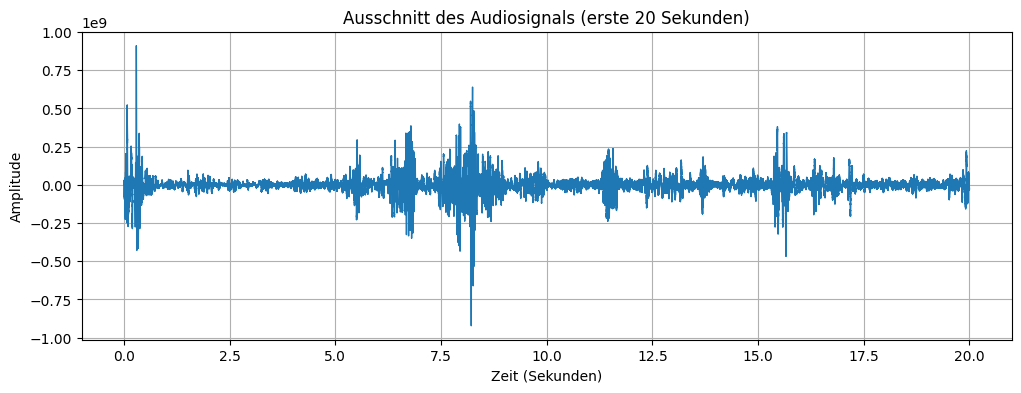

<Figure size 1200x400 with 0 Axes>

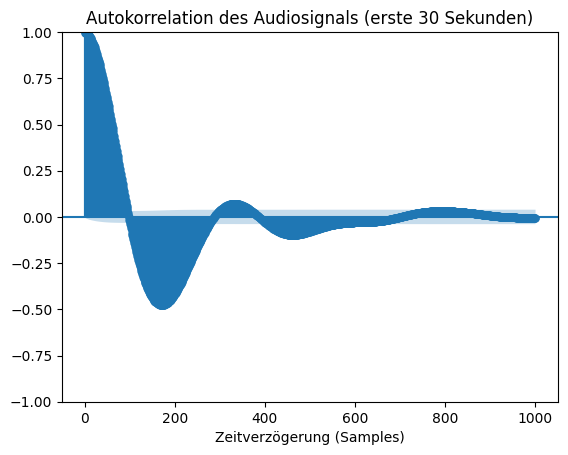

In [44]:
# Kurzer Ausschnitt des Signals (erste 20 Sekunden)
start_sample = 0
end_sample = int(20 * sampling_rate)
time = np.linspace(0, 20, end_sample - start_sample)
audio_excerpt = audio_data[start_sample:end_sample]

# Visualisierung Audio
plt.figure(figsize=(12, 4))
plt.plot(time, audio_excerpt, linewidth=1)
plt.title("Ausschnitt des Audiosignals (erste 20 Sekunden)")
plt.xlabel("Zeit (Sekunden)")
plt.ylabel("Amplitude")
plt.grid(True)
plt.show()

# Auswahl längeren Ausschnitts für Autokorrelationsanalyse (erste 30 Sekunden)
end_sample_long = int(30 * sampling_rate)
audio_excerpt_long = audio_data[start_sample:end_sample_long]

# Downsampling auf 11025 Hz zur Beschleunigung der Berechnung (mein Laptop ist leider recht mühsam)
audio_excerpt_long = librosa.resample(audio_excerpt_long.astype(float), orig_sr=sampling_rate, target_sr=11025)
sampling_rate = 11025

# Autokorrelationsanalyse
plt.figure(figsize=(12, 4))
sm.graphics.tsa.plot_acf(audio_excerpt_long, lags=1000, title="Autokorrelation des Audiosignals (erste 30 Sekunden)")
plt.xlabel("Zeitverzögerung (Samples)")
plt.show()


<Figure size 1200x400 with 0 Axes>

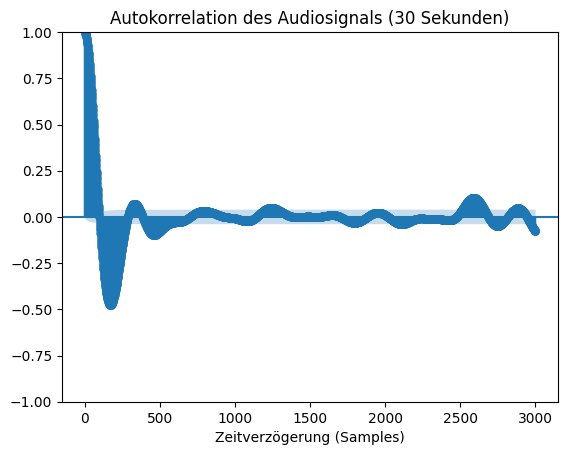

In [45]:
# Autokorrelationsanalyse für mehr Lags
plt.figure(figsize=(12, 4))
sm.graphics.tsa.plot_acf(audio_excerpt_long, lags=3000, title="Autokorrelation des Audiosignals (30 Sekunden)")
plt.xlabel("Zeitverzögerung (Samples)")
plt.show()


In [ ]:
# Abspielen gesamte Audio
display(Audio(audio_data, rate=sampling_rate))

#### Day 2: Auto-Correlation - Analyzing Results

Zeigt starke Amplitudenänderungen und schnelle Ausschläge zu Beginn.
Die Abnahme der Amplitude könnte auf leiser werdende oder kürzere Laute hinweisen.

Autokorrelationsanalyse:  
Periodizität ist teilweise erkennbar.
Die Autokorrelationsgrafiken zeigen regelmäßige Schwankungen, insbesondere bei weniger Lags (1000). Dies deutet darauf hin, dass die Vogelgeräusche bestimmte wiederkehrende Muster enthalten, die jedoch durch die Überlagerung verschiedener Rufe teilweise verwischt werden.  

Der erste Peak bei Lag = 0 ist erwartungsgemäß 1 (perfekte Korrelation).
Das negative Minimum zeigt eine starke Antikorrelation bei bestimmten Zeitverzögerungen, was typisch für abwechselnde Muster ist (z. B. unterschiedliche Rufe).
Die schwankende Kurve deutet auf komplexe, aber wiederkehrende Muster hin.

Starkes negatives Minimum zu beginn:  
Könnte darauf hinweisen, dass auf einen lauten Ruf ein leiserer folgt.

Sampling Rate (11.025 Hz, Downsampling):
Um die Rechenlast zu verringern.
Trotzdem genügend hoch, um die relevanten Frequenzen der Vogelrufe zu erfassen.

Lags (1000 vs. 3000):
1000 Lags: Zeigt die kurzfristige Periodizität deutlich, was hilfreich ist, um wiederholte Muster auf kurzen Zeitskalen zu identifizieren.
3000 Lags: Die Glättung deutet darauf hin, dass über längere Zeiträume die Periodizität weniger ausgeprägt ist, vermutlich aufgrund der Überlagerung mehrerer Vögel.

#### Day 3: Cross-Correlation - Defining a Use Case for Signal Detection

Anwendungsfall:
Identifikation spezifischer Vogelrufe in kürzeren Audioaufnahmen:

In den österreichischen Wäldern gibt es eine Vielzahl von Vogelarten mit unterschiedlichen Rufen.
Ziel ist es, spezifische Rufmuster eines bestimmten Vogels in einer 3-minütigen Aufnahme zu erkennen.
Dies könnte helfen, die Anwesenheit bestimmter Arten zu bestätigen oder erste Hinweise auf ihr Verhalten zu erhalten.
Eine weitergehende Analyse (wie die Erkennung unterschiedlicher Verhaltensphasen) wäre sinnvoll, ist jedoch mit der aktuellen Dauer der Aufnahme nicht möglich.

Problemstellung:  
Wie lässt sich ein charakteristischer Vogelruf innerhalb einer 3-minütigen Aufnahme zuverlässig erkennen?

Ausschneiden eines interessanten Teils des Signals:
Warum dieses Stück?
Wähle einen Abschnitt, der deutlich erkennbare und klare Vogelrufe enthält. Analyse der gesamten Audio (siehe unten)
Optimalerweise einen Teil mit wenig Hintergrundgeräusch, um die Detektion zu erleichtern.

Nachfolgend wird mit Kreuzkorrelation überprüft, ob dieses spezifische Rufmuster einmal oder mehrmals in der gesamten Aufnahme vorkommt.
Peaks in der Kreuzkorrelation würden auf mehrfache Vorkommen hinweisen.

Erwartet wird ein mehrmaliges Vorkommen da Vogelrufe oft wiederholt werden, um Territorien zu markieren oder Partner anzulocken.

Die Fähigkeit, wiederholte Muster zuverlässig zu erkennen, könnte helfen, bestimmte Arten zu identifizieren oder ihre Verhaltensmuster zu analysieren.
Dies ist besonders nützlich für Feldforschung und das Monitoring von Populationen.

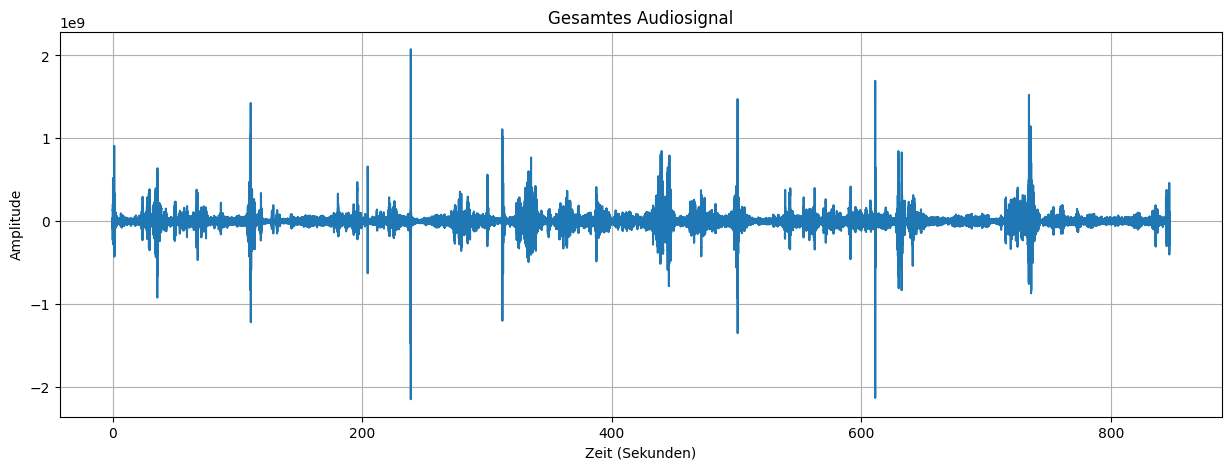

In [47]:
# Visualisierung des gesamten Signals
duration = len(audio_data) / sampling_rate
time = np.linspace(0, duration, len(audio_data))
plt.figure(figsize=(15, 5))
plt.plot(time, audio_data)
plt.title("Gesamtes Audiosignal")
plt.xlabel("Zeit (Sekunden)")
plt.ylabel("Amplitude")
plt.grid(True)
plt.show()


Entscheid für das signifikant Ausschlagende Signal: 
Gewählt wurde dieses, da hier scheinbar am wengisten Hintergrundgeräusche (überlagerung mit anderen Vogellauten) bzw. Rauschen vorhanden ist und es eindeutig erkennbar ist (nicht zu allgemein).

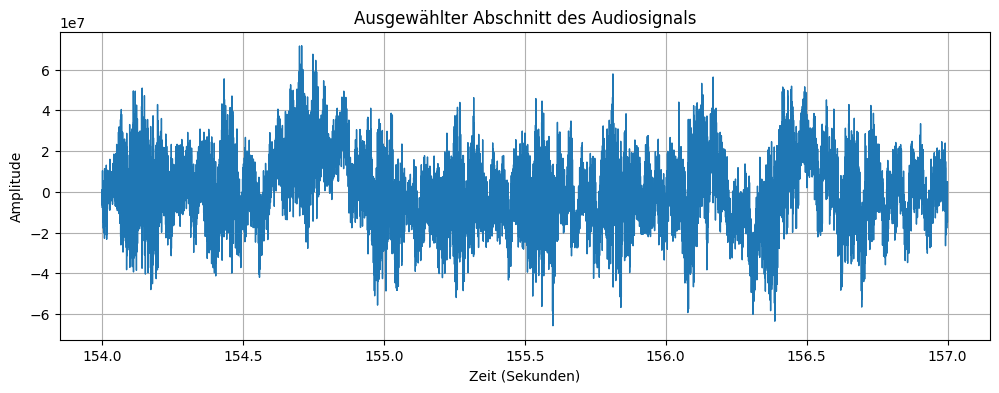

In [48]:
# Auswahl interessanter Abschnitt
start_time = 154 #238.9 #62.55 #2  # in Sekunden
end_time = 157 #239 #65 #4  #313
start_sample = int(start_time * sampling_rate)
end_sample = int(end_time * sampling_rate)
signal_section = audio_data[start_sample:end_sample]

# Visualisierung des Abschnitts
time_section = np.linspace(start_time, end_time, len(signal_section))
plt.figure(figsize=(12, 4))
plt.plot(time_section, signal_section, linewidth=1)
plt.title("Ausgewählter Abschnitt des Audiosignals")
plt.xlabel("Zeit (Sekunden)")
plt.ylabel("Amplitude")
plt.grid(True)
plt.show()


In [49]:
start_time_signal = 154  #109 #154 # in Sekunden
end_time_signal = 157 #114 #157 
start_sample_signal = int(start_time_signal * sampling_rate)
end_sample_signal = int(end_time_signal * sampling_rate)
signal_section = audio_data[start_sample_signal:end_sample_signal]

In [50]:
# Abspielen des gewählten Abschnitts
display(Audio(signal_section, rate=sampling_rate))

Der Abschnitt zeigt deutliche Ausschläge in der Amplitude, was auf spezifische Rufe hinweist, die sich klar vom Rauschen abheben.  
Die vielfältigen Peaks erleichtern die Erkennung wiederkehrender Muster. Aufgrund der klaren Struktur ist er besonders geeignet für die Kreuzkorrelation.

#### Day 4: Cross-Correlation - Finding the Cut Piece

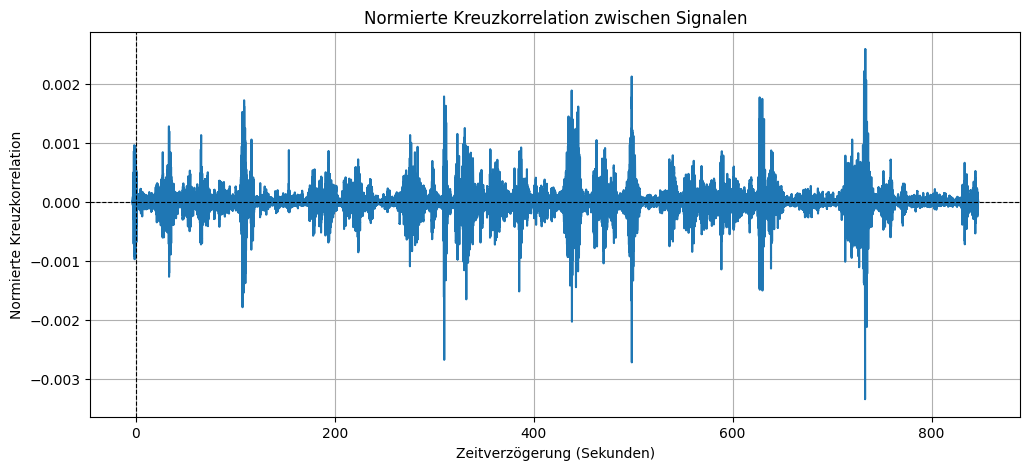

Index der höchsten Korrelation: 8118159
Zeitverzögerung mit höchster Korrelation: 733.3410430839002 Sekunden


In [51]:
# Funktion Berechnung Kreuzkorrelation (basis Hands-on session)
def calculate_cross_correlation(s1, s2, do_normalize=True):
    s1 = np.array(s1).flatten()
    s2 = np.array(s2).flatten()

    if do_normalize:
        # Normalisieren (Mittelwert 0, Standardabweichung 1)
        s1 = (s1 - np.mean(s1)) / np.std(s1)
        s2 = (s2 - np.mean(s2)) / np.std(s2)

    # Kreuzkorrelation berechnen
    corr = signal.correlate(s1, s2, mode='full', method='fft') # fft für Beschleunigung

    if do_normalize:
        # Normierung durch die Länge von s1
        corr /= len(s1)

    return corr

# Berechnung der Kreuzkorrelation zwischen gesamten Signal und gewähltem Abschnitt
cross_corr = calculate_cross_correlation(audio_data, signal_section)

# Berechnung lags
lags = np.arange(-len(signal_section) + 1, len(audio_data))

# Visualisierung Kreuzkorrelation
plt.figure(figsize=(12, 5))
plt.plot(lags / sampling_rate, cross_corr, linestyle='-')
plt.axhline(0, color='black', linestyle='--', linewidth=0.8)
plt.axvline(0, color='black', linestyle='--', linewidth=0.8)
plt.xlabel("Zeitverzögerung (Sekunden)")
plt.ylabel("Normierte Kreuzkorrelation")
plt.title("Normierte Kreuzkorrelation zwischen Signalen")
plt.grid(True)
plt.show()

# Bestimmung Punkt mit höchster Korrelation
max_index = np.argmax(cross_corr)
max_lag = lags[max_index] / sampling_rate

print("Index der höchsten Korrelation:", max_index)
print("Zeitverzögerung mit höchster Korrelation:", max_lag, "Sekunden")


Normierte Kreuzkorrelation:  
Werte nahe 1 deuten auf eine starke positive Ähnlichkeit hin, Werte nahe -1 auf eine starke negative Ähnlichkeit.  

Peaks:  
Deutliche Peaks zeigen darauf hin, dass der ausgewählte Signalabschnitt an diesen Zeitpunkten im Gesamtsignal vorkommt.
Je höher der Peak, desto stärker ist die Übereinstimmung.

Negative Peaks:  
Die häufigeren negativen Peaks könnten darauf hindeuten, dass bestimmte Teile des Signals phasengedreht oder invertiert vorkommen. Bei Vogelrufen könnte dies durch Echos, Reflexionen an Bäumen oder unterschiedliche Aufnahmewinkel verursacht werden. Eine andere Erklärung wäre, dass ähnliche Frequenzmuster vorkommen, die jedoch in ihrer Phasenlage verschoben sind. Auch in diesem Fall könnte Filterung das Ergebniss verschärfen.

Rauschen:  
Die vielen kleinen "Peaks" um 0 deuten auf Rauschen oder Überlagerungen hin, welche aber nicht signifikant sind, dennoch könnte man weiters den Buttersworth-filter anwenden um dies zu reduzieren.

In [52]:
# Analyse Peaks in Kreuzkorrelation mit Mindestabstand
min_distance = int(len(signal_section))  # Mindestabstand basierend auf der Länge des Abschnitts
peaks, _ = signal.find_peaks(cross_corr, height=np.max(cross_corr) * 0.6, distance=min_distance)
peak_times = lags[peaks] / sampling_rate

# Negative Zeitverzögerunge entfernen
peak_times = peak_times[peak_times >= 0]

if len(peak_times) > 0:
    print(f"Der ausgewählte Abschnitt wurde {len(peak_times)} mal im Gesamtsignal gefunden.")
    print("Zeitpunkte der gefundenen Muster:")
    for peak in peak_times:
        print(f" - {peak:.2f} Sekunden")
else:
    print("Der ausgewählte Abschnitt wurde nicht im Gesamtsignal gefunden.")


Der ausgewählte Abschnitt wurde 7 mal im Gesamtsignal gefunden.
Zeitpunkte der gefundenen Muster:
 - 109.00 Sekunden
 - 309.94 Sekunden
 - 438.23 Sekunden
 - 444.80 Sekunden
 - 498.55 Sekunden
 - 627.15 Sekunden
 - 733.34 Sekunden


In [53]:
start_time_signal_test = 109 #154 # in Sekunden
end_time_signal_test = 114 #157 
start_sample_signal_test = int(start_time_signal_test * sampling_rate)
end_sample_signal_test = int(end_time_signal_test * sampling_rate)
signal_section_test = audio_data[start_sample_signal_test:end_sample_signal_test]

# Abspielen der Test Samples
display(Audio(signal_section_test, rate=sampling_rate))

Der ausgewählte Abschnitt wurde 7 Mal im Gesamtsignal gefunden.  
Die moderate Anzahl an Treffern deutet darauf hin, dass der Abschnitt spezifisch genug ist, um nicht bloß Rauschen zu korrelieren.  
Die gleichmäßige Verteilung der Peaks spricht für wiederkehrende Muster und nicht für zufälliges Rauschen.  

Allerdings war es nicht unbedingt zu erwarten, dass der gewählte Abschnitt genau 7 mal vorkommt, da dies stark von der Struktur der Vogelrufe und der Vielfalt im Gesamtsignal abhängt. Die Tatsache, dass es 7 Treffer gibt, deutet darauf hin, dass der Abschnitt entweder besonders typisch für bestimmte wiederkehrende Rufe ist oder dass ähnliche Sequenzen mehrfach vorkommen.

Die Peaks im Plot der normierten Kreuzkorrelation bestätigen die gefundenen Zeitpunkte. Die hohen Ausschläge deuten auf starke Übereinstimmungen zwischen dem gewählten Abschnitt und dem Gesamtsignal hin. Die gleichmäßige Verteilung der Peaks über die Zeit spricht dafür, dass die Rufe periodisch auftreten und nicht zufällig sind.

Die Ergebnisse sind sinnvoll, wenn die Vogelrufe im Wald tatsächlich regelmäßig wiederkehren. Die Anzahl und Verteilung der Peaks spricht eher für wiederkehrende Muster als für zufällige Übereinstimmungen oder Rauschen. Um dies zu bestätigen, könnte man weitere Filterungen anwenden oder die Analyse mit anderen Abschnitten wiederholen.

Im gegebenen Audio ausschnitt ist nun auch die Ähnlichkeit zum ursprünglich gewählten Abschnitt hörbar.

C:\Users\sabin\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


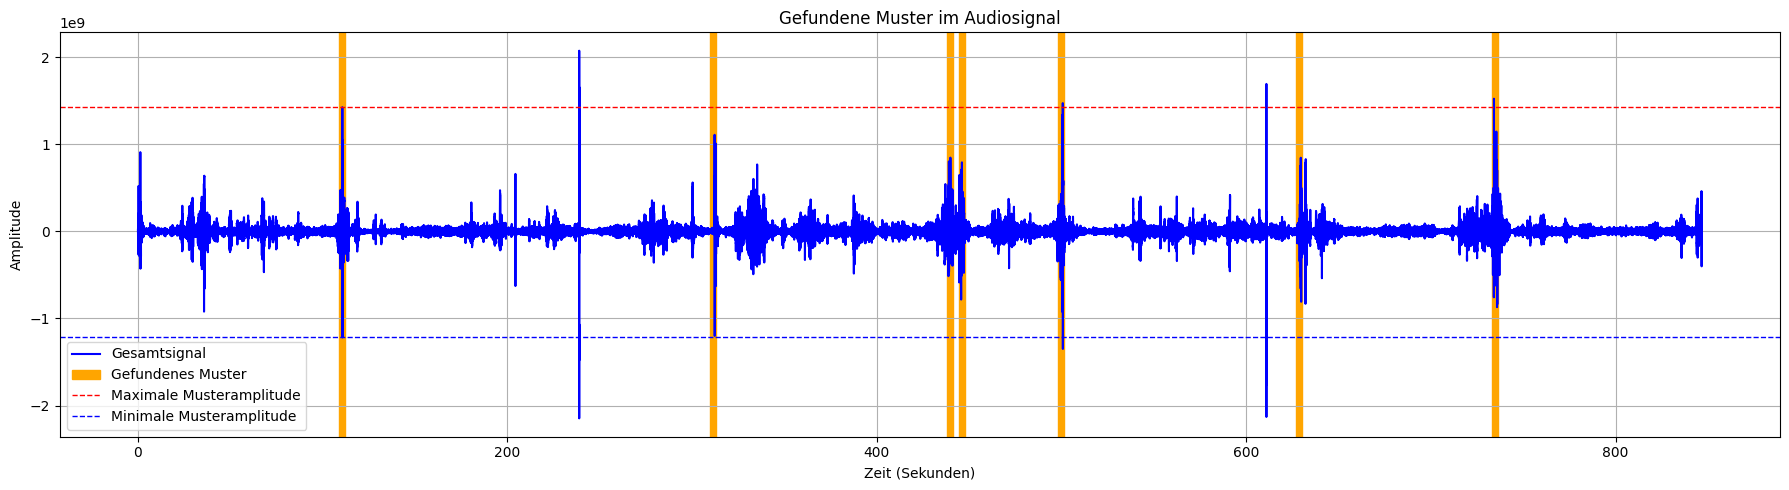

In [54]:
# Gefundene Peaks(in Sekunden)
peak_times = np.array([109.0, 309.94, 438.23, 498.34, 444.80, 627.15, 733.34])
pattern_duration = len(signal_section) / sampling_rate

# Zeitachse gesamtes Signal
time_full = np.arange(len(audio_data)) / sampling_rate

plt.figure(figsize=(18, 5))
plt.plot(time_full, audio_data, color='blue', label="Gesamtsignal")

for pt in peak_times:
    plt.axvspan(pt, pt + pattern_duration, color='orange', alpha=1, label='Gefundenes Muster' if pt == peak_times[0] else "")

plt.xlabel("Zeit (Sekunden)")
plt.ylabel("Amplitude")
plt.title("Gefundene Muster im Audiosignal")
plt.grid(True)
plt.tight_layout()

# Zeitbereich gefundenes Musters und daraus die echte Amplitude (für Plot)
first_match_sample = int(peak_times[0] * sampling_rate)
pattern_length_samples = int(pattern_duration * sampling_rate)
real_pattern = audio_data[first_match_sample:first_match_sample + pattern_length_samples]
max_amp = np.max(real_pattern)
min_amp = np.min(real_pattern)

# Horizontale Linien bei min/max Amplituden des ersten Ausschnitts
plt.axhline(max_amp, color='red', linestyle='--', linewidth=1, label='Maximale Musteramplitude')
plt.axhline(min_amp, color='blue', linestyle='--', linewidth=1, label='Minimale Musteramplitude')
plt.legend()
plt.show()


Die Amplituden der gefundenen Signale unterscheiden sich leicht, was völlig normal ist - natürliche Aufnahmen wie Vogelrufe variieren in Lautstärke und Form, und die Kreuzkorrelation findet ähnliche, aber nicht exakt identische Muster. Auch Umgebungsgeräusche und unterschiedliche Aufnahmebedingungen beeinflussen die Signalstärke.

**Buttersworth-filter**

wurde angewandt um die Hintergrundgeräusche zu dämpfen - hier wurden allerdings noch nicht die passenden Parameter gefunden, da man am Resultat sehen kann, dass zu stark gefiltert wird und nun einige Treffer von vorher wegfallen.

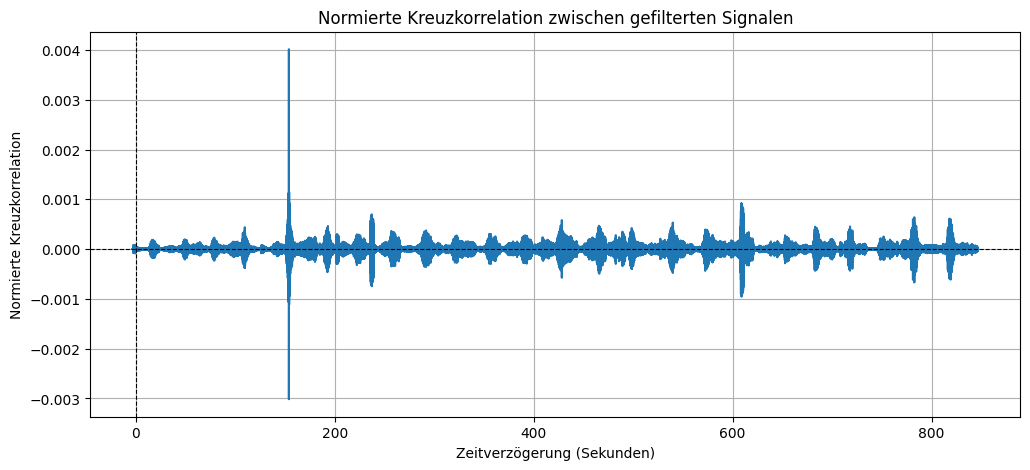

Der gefilterte Abschnitt wurde 2 mal im gefilterten Gesamtsignal gefunden.
Zeitpunkte der gefundenen Muster:
 - 154.00 Sekunden
 - 608.89 Sekunden


In [55]:
# Nyquist-Frequenz definieren
nyq = 0.5 * sampling_rate

# Frequenzbereich
lowcut = 100  # kHz
highcut = min(5000, 0.9 * nyq)

def butter_bandpass(lowcut, highcut, fs, order=2):  # Reduzierter Order
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return b, a

def butter_bandpass_filter(data, lowcut, highcut, fs, order=2):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = filtfilt(b, a, data)
    return y

filtered_audio_data = butter_bandpass_filter(audio_data, lowcut, highcut, sampling_rate)

filtered_signal_section = butter_bandpass_filter(signal_section, lowcut, highcut, sampling_rate)

cross_corr_filtered = calculate_cross_correlation(filtered_audio_data, filtered_signal_section)
lags = signal.correlation_lags(len(filtered_audio_data), len(filtered_signal_section), mode='full')

# Zeitachse Kreuzkorrelation
time_lags = lags / sampling_rate

plt.figure(figsize=(12, 5))
plt.plot(time_lags, cross_corr_filtered, linestyle='-')
plt.axhline(0, color='black', linestyle='--', linewidth=0.8)
plt.axvline(0, color='black', linestyle='--', linewidth=0.8)
plt.xlabel("Zeitverzögerung (Sekunden)")
plt.ylabel("Normierte Kreuzkorrelation")
plt.title("Normierte Kreuzkorrelation zwischen gefilterten Signalen")
plt.grid(True)
plt.show()


peaks, _ = signal.find_peaks(cross_corr_filtered, height=np.max(cross_corr_filtered) * 0.2, distance=int(len(filtered_signal_section)))
peak_times = time_lags[peaks]

if len(peak_times) > 0:
    print(f"Der gefilterte Abschnitt wurde {len(peak_times)} mal im gefilterten Gesamtsignal gefunden.")
    print("Zeitpunkte der gefundenen Muster:")
    for peak in peak_times:
        print(f" - {peak:.2f} Sekunden")
else:
    print("Der gefilterte Abschnitt wurde nicht im gefilterten Gesamtsignal gefunden.")


In [56]:
start_time_signal_test_butt = 612  #154 # in Sekunden
end_time_signal_test_butt = 614 #157 
start_sample_signal_test_butt = int(start_time_signal_test_butt * sampling_rate)
end_sample_signal_test_butt = int(end_time_signal_test_butt * sampling_rate)
signal_section_test_butt = audio_data[start_sample_signal_test_butt:end_sample_signal_test_butt ]

display(Audio(signal_section_test_butt, rate=sampling_rate))

#### Day 5: Cross-Correlation - Applying Changes to the Signal

Da vorherigen Ergebnisse gezeigt haben, dass die Anwendung des Buttersworth-filter die Auffindungen zu stark reduziert wird nachgehend darauf verzichtet.  

Stattdessen wird **"weisses Rauschen" hinzugefügt** um die Robustheit der Kreuzkorrelation zu testen:  
Simuliert realistische Umgebungen mit Wind, Blättern oder anderen Vögeln (andere Vögel bereits vorhanden).

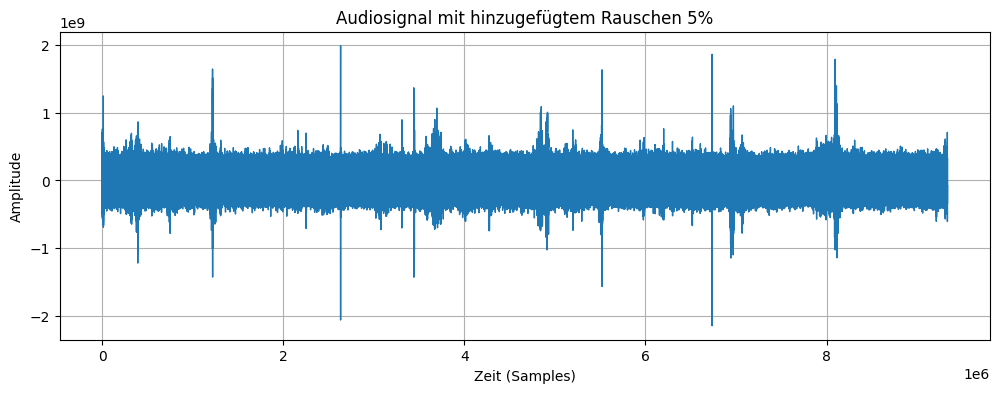

In [57]:
# Hinzufügen weisses Rauschen
noise_level = 0.05 * np.max(audio_data)  # 5% des max. Pegels
noise = np.random.normal(0, noise_level, len(audio_data))
signal_with_noise = audio_data + noise

# Visualisieren verrauschtes Signal
plt.figure(figsize=(12, 4))
plt.plot(signal_with_noise, linewidth=1)
plt.title("Audiosignal mit hinzugefügtem Rauschen 5%")
plt.xlabel("Zeit (Samples)")
plt.ylabel("Amplitude")
plt.grid(True)
plt.show()


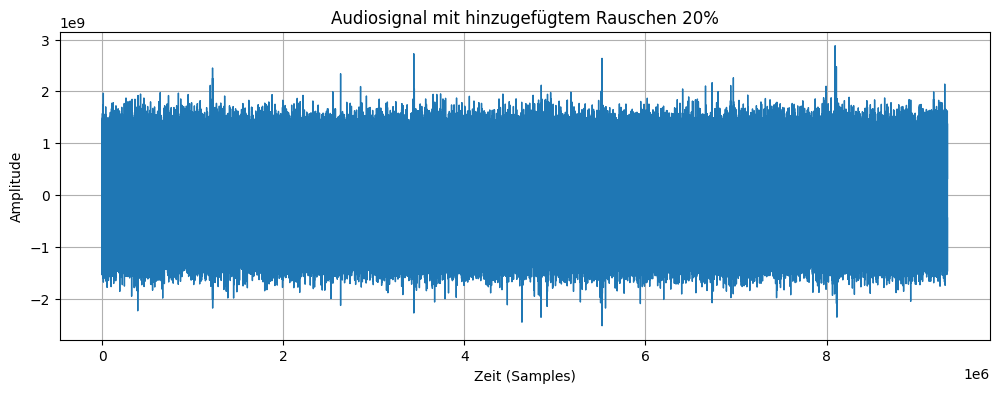

In [58]:
# Hinzufügen weisses Rauschen
noise_level_big = 0.20 * np.max(audio_data)  # 20% des max. Pegels
noise = np.random.normal(0, noise_level_big, len(audio_data))
signal_with_noise_big = audio_data + noise

# Visualisieren verrauschtes Signal
plt.figure(figsize=(12, 4))
plt.plot(signal_with_noise_big, linewidth=1)
plt.title("Audiosignal mit hinzugefügtem Rauschen 20%")
plt.xlabel("Zeit (Samples)")
plt.ylabel("Amplitude")
plt.grid(True)
plt.show()


Weiters wird die **Lautstärke erhöht (Amplitude Scaling)**:  
Testet, ob die Kreuzkorrelation auch bei leiseren oder lauteren Vogelrufen funktioniert.  
In der Natur variieren die Lautstärken durch Entfernung oder Orientierung der Vögel.

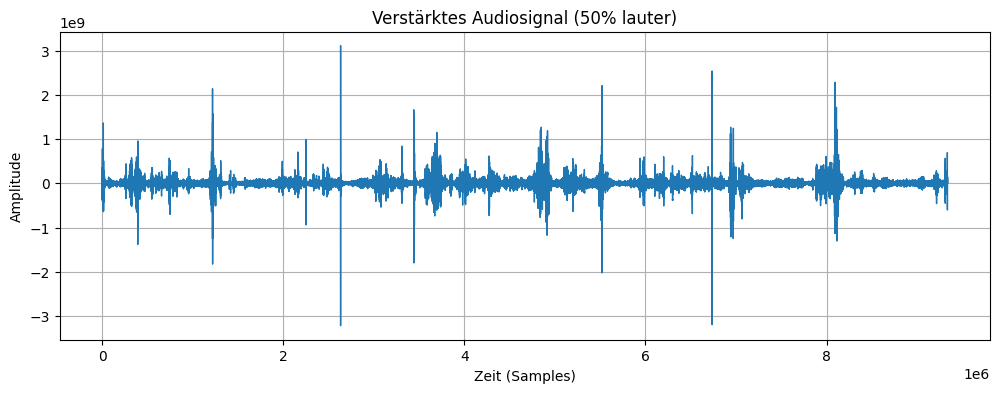

In [59]:
# Verstärkung um 50%
scaled_signal_loud = audio_data * 1.5

# Visualisieren des skalierten Signals
plt.figure(figsize=(12, 4))
plt.plot(scaled_signal_loud, linewidth=1)
plt.title("Verstärktes Audiosignal (50% lauter)")
plt.xlabel("Zeit (Samples)")
plt.ylabel("Amplitude")
plt.grid(True)
plt.show()

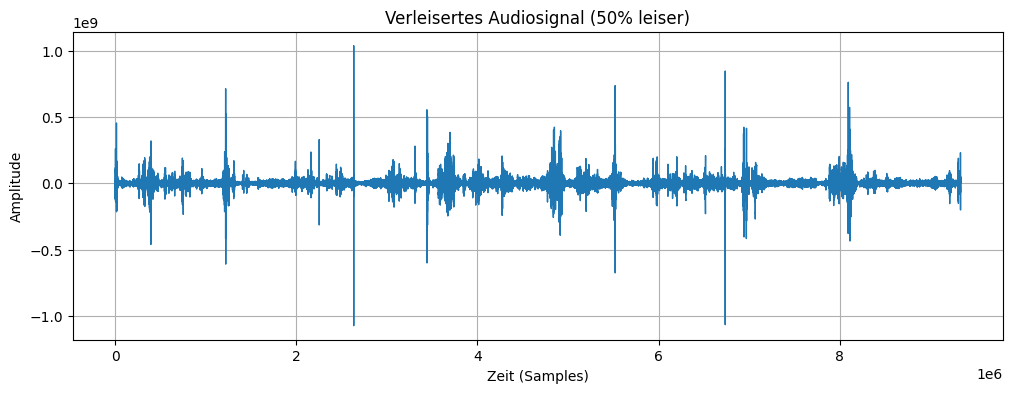

In [60]:
# Verleiserung um 50%
scaled_signal_quiet = audio_data * 0.5

# Visualisieren des skalierten Signals
plt.figure(figsize=(12, 4))
plt.plot(scaled_signal_quiet, linewidth=1)
plt.title("Verleisertes Audiosignal (50% leiser)")
plt.xlabel("Zeit (Samples)")
plt.ylabel("Amplitude")
plt.grid(True)
plt.show()

Hilfreich kann auch eine Kombination dieser beiden Transformationen sein.

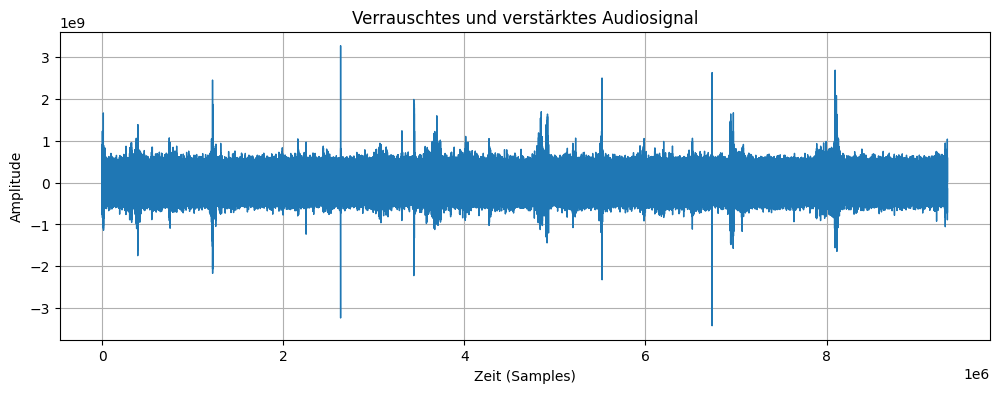

In [61]:
# Hinzufügen weisses Rauschen
noise_level = 0.05 * np.max(audio_data)  # 5% des max. Pegels
noise = np.random.normal(0, noise_level, len(audio_data))
signal_with_noise = audio_data + noise

# Verstärkung 50% nach Hinzufügen Rauschen
combined_signal = signal_with_noise * 1.5

# Visualisieren verrauschtes und verstärktes Signal
plt.figure(figsize=(12, 4))
plt.plot(combined_signal, linewidth=1)
plt.title("Verrauschtes und verstärktes Audiosignal")
plt.xlabel("Zeit (Samples)")
plt.ylabel("Amplitude")
plt.grid(True)
plt.show()

#### Day 6: Cross-Correlation - Testing on the Modified Signal

##### Signal mit weissem Rauschen

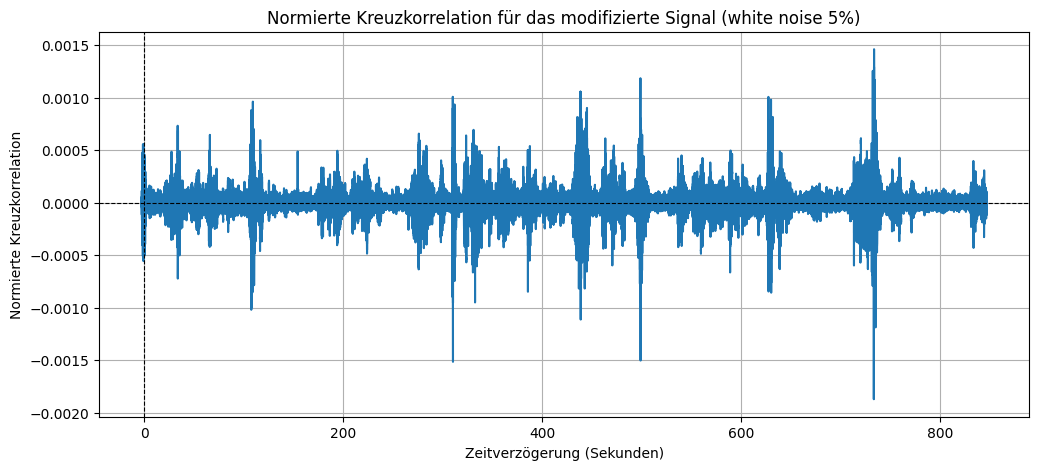

Index der höchsten Korrelation (modifiziertes Signal (white noise 5%)): 8118193
Zeitverzögerung mit höchster Korrelation (modifiziertes Signal (white noise 5%)): 733.344126984127 Sekunden
Der ausgewählte Abschnitt wurde 7 mal im Gesamtsignal gefunden.
Zeitpunkte der gefundenen Muster:
 - 109.00 Sekunden
 - 309.94 Sekunden
 - 438.23 Sekunden
 - 444.80 Sekunden
 - 498.55 Sekunden
 - 627.15 Sekunden
 - 733.34 Sekunden


In [62]:
# Anwendung der bestehenden Funktion auf das modifizierte Signal
cross_corr_modified_noise = calculate_cross_correlation(signal_with_noise, signal_section)

# Berechnung lags für das modifizierte Signal
lags_modified = np.arange(-len(signal_section) + 1, len(signal_with_noise))

# Visualisierung der Kreuzkorrelation für das modifizierte Signal
plt.figure(figsize=(12, 5))
plt.plot(lags_modified / sampling_rate, cross_corr_modified_noise, linestyle='-')
plt.axhline(0, color='black', linestyle='--', linewidth=0.8)
plt.axvline(0, color='black', linestyle='--', linewidth=0.8)
plt.xlabel("Zeitverzögerung (Sekunden)")
plt.ylabel("Normierte Kreuzkorrelation")
plt.title("Normierte Kreuzkorrelation für das modifizierte Signal (white noise 5%)")
plt.grid(True)
plt.show()

# Bestimmung Punkt mit höchster Korrelation im modifizierten Signal
max_index_modified = np.argmax(cross_corr_modified_noise)
max_lag_modified = lags_modified[max_index_modified] / sampling_rate

print("Index der höchsten Korrelation (modifiziertes Signal (white noise 5%)):", max_index_modified)
print("Zeitverzögerung mit höchster Korrelation (modifiziertes Signal (white noise 5%)):", max_lag_modified, "Sekunden")

# Analyse Peaks in Kreuzkorrelation mit Mindestabstand
min_distance = int(len(signal_section))  # Mindestabstand basierend auf der Länge des Abschnitts
peaks, _ = signal.find_peaks(cross_corr, height=np.max(cross_corr) * 0.6, distance=min_distance)
peak_times = lags[peaks] / sampling_rate

if len(peaks) > 0:
    print(f"Der ausgewählte Abschnitt wurde {len(peaks)} mal im Gesamtsignal gefunden.")
    print("Zeitpunkte der gefundenen Muster:")
    for peak in peaks:
        print(f" - {lags[peak] / sampling_rate:.2f} Sekunden")
else:
    print("Der ausgewählte Abschnitt wurde nicht im Gesamtsignal gefunden.")


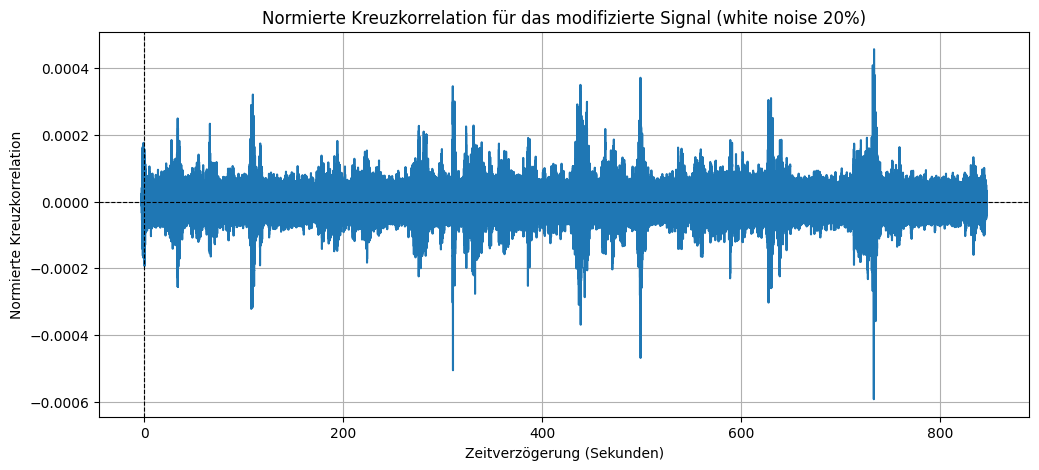

Index der höchsten Korrelation (modifiziertes Signal (white noise 20%)): 8118111
Zeitverzögerung mit höchster Korrelation (modifiziertes Signal (white noise 20%)): 733.3366893424036 Sekunden
Der ausgewählte Abschnitt wurde 7 mal im Gesamtsignal gefunden.
Zeitpunkte der gefundenen Muster:
 - 109.00 Sekunden
 - 309.94 Sekunden
 - 438.23 Sekunden
 - 444.80 Sekunden
 - 498.55 Sekunden
 - 627.15 Sekunden
 - 733.34 Sekunden


In [63]:
# Anwendung der bestehenden Funktion auf das modifizierte Signal
cross_corr_modified_noise = calculate_cross_correlation(signal_with_noise_big, signal_section)

# Berechnung lags für das modifizierte Signal
lags_modified = np.arange(-len(signal_section) + 1, len(signal_with_noise_big))

# Visualisierung der Kreuzkorrelation für das modifizierte Signal
plt.figure(figsize=(12, 5))
plt.plot(lags_modified / sampling_rate, cross_corr_modified_noise, linestyle='-')
plt.axhline(0, color='black', linestyle='--', linewidth=0.8)
plt.axvline(0, color='black', linestyle='--', linewidth=0.8)
plt.xlabel("Zeitverzögerung (Sekunden)")
plt.ylabel("Normierte Kreuzkorrelation")
plt.title("Normierte Kreuzkorrelation für das modifizierte Signal (white noise 20%)")
plt.grid(True)
plt.show()

# Bestimmung Punkt mit höchster Korrelation im modifizierten Signal
max_index_modified = np.argmax(cross_corr_modified_noise)
max_lag_modified = lags_modified[max_index_modified] / sampling_rate

print("Index der höchsten Korrelation (modifiziertes Signal (white noise 20%)):", max_index_modified)
print("Zeitverzögerung mit höchster Korrelation (modifiziertes Signal (white noise 20%)):", max_lag_modified, "Sekunden")

# Analyse Peaks in Kreuzkorrelation mit Mindestabstand
min_distance = int(len(signal_section))  # Mindestabstand basierend auf der Länge des Abschnitts
peaks, _ = signal.find_peaks(cross_corr, height=np.max(cross_corr) * 0.6, distance=min_distance)
peak_times = lags[peaks] / sampling_rate

if len(peaks) > 0:
    print(f"Der ausgewählte Abschnitt wurde {len(peaks)} mal im Gesamtsignal gefunden.")
    print("Zeitpunkte der gefundenen Muster:")
    for peak in peaks:
        print(f" - {lags[peak] / sampling_rate:.2f} Sekunden")
else:
    print("Der ausgewählte Abschnitt wurde nicht im Gesamtsignal gefunden.")


##### Signal mit Amplitude Scaling

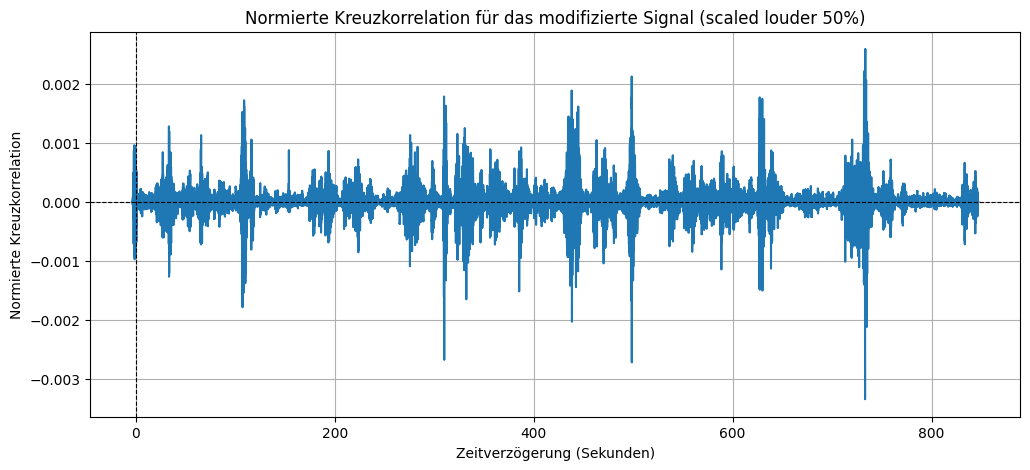

Index der höchsten Korrelation (modifiziertes Signal (scaled louder 50%)): 8118159
Zeitverzögerung mit höchster Korrelation (modifiziertes Signal (scaled louder 50%)): 733.3410430839002 Sekunden
Der ausgewählte Abschnitt wurde 7 mal im Gesamtsignal gefunden.
Zeitpunkte der gefundenen Muster:
 - 109.00 Sekunden
 - 309.94 Sekunden
 - 438.23 Sekunden
 - 444.80 Sekunden
 - 498.55 Sekunden
 - 627.15 Sekunden
 - 733.34 Sekunden


In [64]:
# Anwendung der bestehenden Funktion auf das modifizierte Signal
cross_corr_modified_scaled = calculate_cross_correlation(scaled_signal_loud, signal_section)

# Berechnung lags für das modifizierte Signal
lags_modified = np.arange(-len(signal_section) + 1, len(scaled_signal_loud))

# Visualisierung der Kreuzkorrelation für das modifizierte Signal
plt.figure(figsize=(12, 5))
plt.plot(lags_modified / sampling_rate, cross_corr_modified_scaled, linestyle='-')
plt.axhline(0, color='black', linestyle='--', linewidth=0.8)
plt.axvline(0, color='black', linestyle='--', linewidth=0.8)
plt.xlabel("Zeitverzögerung (Sekunden)")
plt.ylabel("Normierte Kreuzkorrelation")
plt.title("Normierte Kreuzkorrelation für das modifizierte Signal (scaled louder 50%)")
plt.grid(True)
plt.show()

# Bestimmung Punkt mit höchster Korrelation im modifizierten Signal
max_index_modified = np.argmax(cross_corr_modified_scaled)
max_lag_modified = lags_modified[max_index_modified] / sampling_rate

print("Index der höchsten Korrelation (modifiziertes Signal (scaled louder 50%)):", max_index_modified)
print("Zeitverzögerung mit höchster Korrelation (modifiziertes Signal (scaled louder 50%)):", max_lag_modified, "Sekunden")

# Analyse Peaks in Kreuzkorrelation mit Mindestabstand
min_distance = int(len(signal_section))  # Mindestabstand basierend auf der Länge des Abschnitts
peaks, _ = signal.find_peaks(cross_corr, height=np.max(cross_corr) * 0.6, distance=min_distance)
peak_times = lags[peaks] / sampling_rate

if len(peaks) > 0:
    print(f"Der ausgewählte Abschnitt wurde {len(peaks)} mal im Gesamtsignal gefunden.")
    print("Zeitpunkte der gefundenen Muster:")
    for peak in peaks:
        print(f" - {lags[peak] / sampling_rate:.2f} Sekunden")
else:
    print("Der ausgewählte Abschnitt wurde nicht im Gesamtsignal gefunden.")


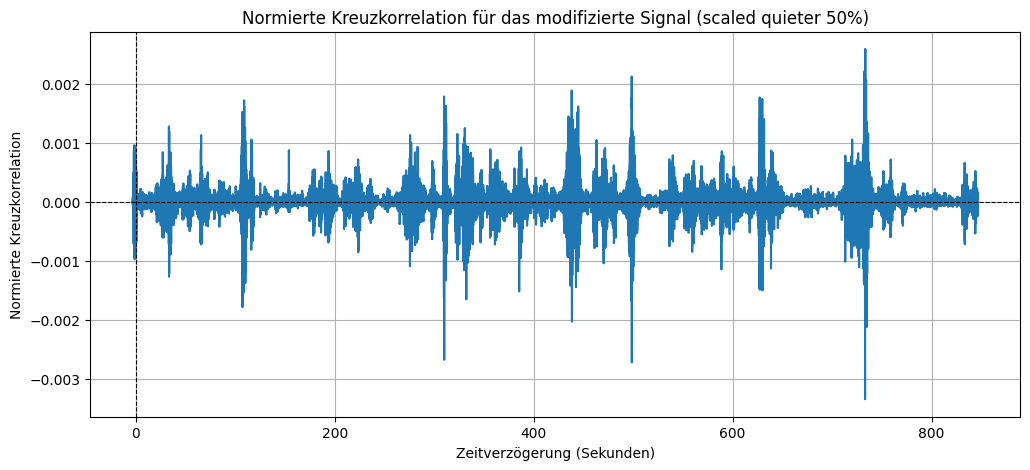

Index der höchsten Korrelation (modifiziertes Signal (scaled quieter 50%)): 8118159
Zeitverzögerung mit höchster Korrelation (modifiziertes Signal (scaled quieter 50%)): 733.3410430839002 Sekunden
Der ausgewählte Abschnitt wurde 7 mal im Gesamtsignal gefunden.
Zeitpunkte der gefundenen Muster:
 - 109.00 Sekunden
 - 309.94 Sekunden
 - 438.23 Sekunden
 - 444.80 Sekunden
 - 498.55 Sekunden
 - 627.15 Sekunden
 - 733.34 Sekunden


In [65]:
# Anwendung der bestehenden Funktion auf das modifizierte Signal
cross_corr_modified_scaled = calculate_cross_correlation(scaled_signal_quiet, signal_section)

# Berechnung lags für das modifizierte Signal
lags_modified = np.arange(-len(signal_section) + 1, len(scaled_signal_quiet))

# Visualisierung der Kreuzkorrelation für das modifizierte Signal
plt.figure(figsize=(12, 5))
plt.plot(lags_modified / sampling_rate, cross_corr_modified_scaled, linestyle='-')
plt.axhline(0, color='black', linestyle='--', linewidth=0.8)
plt.axvline(0, color='black', linestyle='--', linewidth=0.8)
plt.xlabel("Zeitverzögerung (Sekunden)")
plt.ylabel("Normierte Kreuzkorrelation")
plt.title("Normierte Kreuzkorrelation für das modifizierte Signal (scaled quieter 50%)")
plt.grid(True)
plt.show()

# Bestimmung Punkt mit höchster Korrelation im modifizierten Signal
max_index_modified = np.argmax(cross_corr_modified_scaled)
max_lag_modified = lags_modified[max_index_modified] / sampling_rate

print("Index der höchsten Korrelation (modifiziertes Signal (scaled quieter 50%)):", max_index_modified)
print("Zeitverzögerung mit höchster Korrelation (modifiziertes Signal (scaled quieter 50%)):", max_lag_modified, "Sekunden")

# Analyse Peaks in Kreuzkorrelation mit Mindestabstand
min_distance = int(len(signal_section))  # Mindestabstand basierend auf der Länge des Abschnitts
peaks, _ = signal.find_peaks(cross_corr, height=np.max(cross_corr) * 0.6, distance=min_distance)
peak_times = lags[peaks] / sampling_rate

if len(peaks) > 0:
    print(f"Der ausgewählte Abschnitt wurde {len(peaks)} mal im Gesamtsignal gefunden.")
    print("Zeitpunkte der gefundenen Muster:")
    for peak in peaks:
        print(f" - {lags[peak] / sampling_rate:.2f} Sekunden")
else:
    print("Der ausgewählte Abschnitt wurde nicht im Gesamtsignal gefunden.")


##### Combined Signal (Rauschen & Scaling)

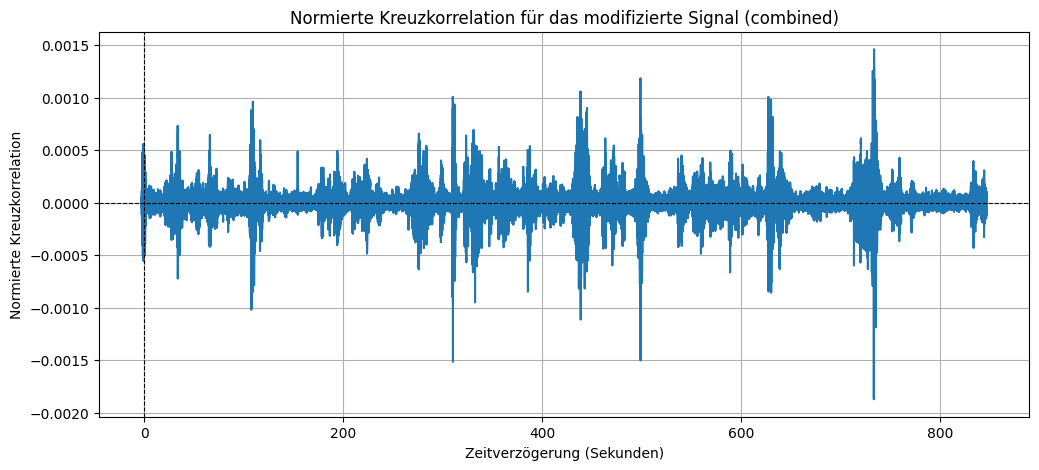

Index der höchsten Korrelation (modifiziertes Signal (combined)): 8118193
Zeitverzögerung mit höchster Korrelation (modifiziertes Signal (combined)): 733.344126984127 Sekunden
Der ausgewählte Abschnitt wurde 7 mal im Gesamtsignal gefunden.
Zeitpunkte der gefundenen Muster:
 - 109.00 Sekunden
 - 309.94 Sekunden
 - 438.23 Sekunden
 - 444.80 Sekunden
 - 498.55 Sekunden
 - 627.15 Sekunden
 - 733.34 Sekunden


In [66]:
# Anwendung der bestehenden Funktion auf das modifizierte Signal
cross_corr_combined = calculate_cross_correlation(combined_signal, signal_section)

# Berechnung lags für das modifizierte Signal
lags_modified = np.arange(-len(signal_section) + 1, len(combined_signal))

# Visualisierung der Kreuzkorrelation für das modifizierte Signal
plt.figure(figsize=(12, 5))
plt.plot(lags_modified / sampling_rate, cross_corr_combined, linestyle='-')
plt.axhline(0, color='black', linestyle='--', linewidth=0.8)
plt.axvline(0, color='black', linestyle='--', linewidth=0.8)
plt.xlabel("Zeitverzögerung (Sekunden)")
plt.ylabel("Normierte Kreuzkorrelation")
plt.title("Normierte Kreuzkorrelation für das modifizierte Signal (combined)")
plt.grid(True)
plt.show()

# Bestimmung Punkt mit höchster Korrelation im modifizierten Signal
max_index_modified = np.argmax(cross_corr_combined)
max_lag_modified = lags_modified[max_index_modified] / sampling_rate

print("Index der höchsten Korrelation (modifiziertes Signal (combined)):", max_index_modified)
print("Zeitverzögerung mit höchster Korrelation (modifiziertes Signal (combined)):", max_lag_modified, "Sekunden")

# Analyse Peaks in Kreuzkorrelation mit Mindestabstand
min_distance = int(len(signal_section))  # Mindestabstand basierend auf der Länge des Abschnitts
peaks, _ = signal.find_peaks(cross_corr, height=np.max(cross_corr) * 0.6, distance=min_distance)
peak_times = lags[peaks] / sampling_rate

if len(peaks) > 0:
    print(f"Der ausgewählte Abschnitt wurde {len(peaks)} mal im Gesamtsignal gefunden.")
    print("Zeitpunkte der gefundenen Muster:")
    for peak in peaks:
        print(f" - {lags[peak] / sampling_rate:.2f} Sekunden")
else:
    print("Der ausgewählte Abschnitt wurde nicht im Gesamtsignal gefunden.")


#### Weiter Analyse (combined)

**Peak-to-Noise Ratio**  
Misst Verhältnis der Höhe der signifikanten Peaks (Vogelrufe) zum durchschnittlichen Rauschen.
Hohe PNR-Werte  (> 20) zeigen, dass die gefundenen Peaks deutlich über dem Hintergrundrauschen liegen.

In [67]:
signal_peak = np.max(cross_corr_combined)
noise_level = np.mean(np.abs(cross_corr_combined[cross_corr_combined < np.max(cross_corr_combined) * 0.1]))
pnr = signal_peak / noise_level
print(f"Peak-to-Noise Ratio (PNR): {pnr:.2f}")

Peak-to-Noise Ratio (PNR): 25.52


PNR ist akzeptabel und bedeutet, dass die erkannten Peaks sich deutlich vom Rauschen abheben.  
Das spricht dafür, dass die identifizierten Zeitpunkte für Vogelrufe wahrscheinlich nicht zufällig durch Rauschen entstanden sind.

**Spektrale Analyse mit Fourier-Transformation**  
Untersucht Frequenzspektrum Vogelrufe, um Muster in bestimmten Frequenzbereichen zu identifizieren.  
Vogelrufe haben oft spezifische Frequenzmuster. Eine Analyse im Frequenzbereich kann ähnliche Rufe besser erkennen als die Zeitbereichsanalyse.  
Oder auch zur Parameterwahl des Butterworth-filters.

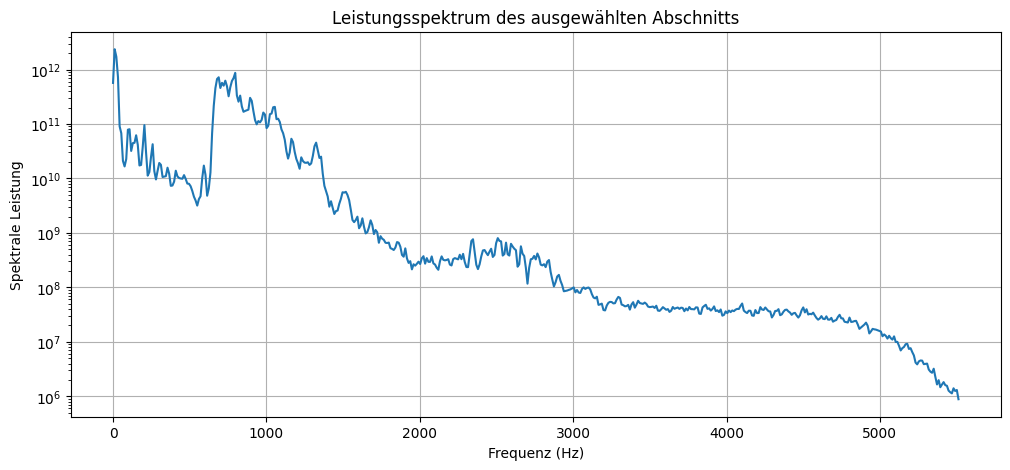

In [68]:
frequencies, power_spectrum = signal.welch(signal_section, fs=sampling_rate, nperseg=1024)

plt.figure(figsize=(12, 5))
plt.semilogy(frequencies, power_spectrum)
plt.title("Leistungsspektrum des ausgewählten Abschnitts")
plt.xlabel("Frequenz (Hz)")
plt.ylabel("Spektrale Leistung")
plt.grid(True)
plt.show()

Der Plot zeigt wie die Leistung des Signals auf verschiedene Frequenzen verteilt ist.  
Es gibt deutliche Ausschläge unter 1000 Hz.
Das deutet darauf hin, dass der ausgewählte Abschnitt viele tieffrequente Komponenten enthält.

Die spektrale Leistung nimmt nach etwa 1000 Hz kontinuierlich ab.
Das ist typisch für Signale, die weniger hohe Frequenzen enthalten oder bei denen hohe Frequenzen durch Filter reduziert wurden.

Die meisten spektralen Komponenten konzentrieren sich im Bereich von etwa 0 bis 2000.
Frequenzen oberhalb von 2000 Hz haben eine deutlich geringere Leistung, was darauf hindeutet, dass die für die Analyse relevanten Informationen eher im unteren Frequenzbereich liegen.

#### Day 7: Cross-Correlation - Discussion and Interpretation

Gewählte Methoden und Parameter:
Kreuzkorrelation (Cross-Correlation):
Die Methode wurde genutzt, um wiederkehrende Muster eines ausgewählten Abschnitts im Gesamtsignal zu identifizieren. Sie eignet sich zur Bestimmung von Ähnlichkeiten zwischen Signalen und ist daher für die Erkennung von Vogelrufen gut geeignet.

Normierung:
Vor der Berechnung wurde das Signal auf Mittelwert = 0 und Standardabweichung = 1 normiert, um Amplitudenunterschiede auszugleichen. Dies verhindert, dass laute oder leise Passagen das Ergebnis verfälschen.

FFT-Methode:
Zur Effizienzsteigerung wurde die Berechnung der Kreuzkorrelation mit der Fast Fourier Transform (FFT) durchgeführt, was den Rechenaufwand erheblich reduziert. Alternative Methoden wie die direkte Faltung wären langsamer, insbesondere bei langen Audiosignalen.

Transformationen zur Robustheitsprüfung:

Weißes Rauschen (5%, 20%): Simuliert realistische Umgebungsbedingungen und testet, ob die Methode auch bei störenden Hintergrundgeräuschen zuverlässig arbeitet.
Amplitude Scaling (+/-50%): Untersucht, ob Veränderungen in der Lautstärke die Erkennung beeinträchtigen.
Kombination beider Transformationen: Stresstest für die Methode zur Prüfung der Gleichzeitigkeit von Störungen.

Die Methode zeigt eine hohe Robustheit gegenüber Amplitudenänderungen und kann auch bei moderatem Rauschen (bis 50% wurde getestet) zuverlässig Signalmuster erkennen.
Normalerweise bleiben bei starkem Rauschen zwar die Haupttreffer erhalten, jedoch nimmt die Genauigkeit ab (falsch-positive Treffer können auftreten) dies war in Falle der Vogelrufe nicht aufgetreten, aber sonst müsste noch ein weitere Filter eingebracht werden.

Das Signal wurde 7-mal im Gesamtsignal gefunden.

Dies ist ein realistisches Ergebnis, da sich Vogelrufe typischerweise mehrmals wiederholen.
Die gleichmäßige Verteilung der Peaks zeigt, dass es sich nicht nur um Zufallsrauschen handelt, sondern um echte Übereinstimmungen.
Einige Peaks könnten durch Überlagerung mit anderen Rufen entstehen – ein Filter kann hier helfen.

Nicht toleriert wurde Starke Filterung: Während der Butterworth-Filter das Rauschen reduziert, kann er auch schwächere Vogelrufe abschwächen und filterte somit einige stimmende Treffer.

Zusätzliche quantitative Bewertung (KPIs):  
Peak-to-Noise Ratio (PNR): 25.27 → Signalstärke bleibt trotz Störungen stabil.  

Leistungsspektrum: Zeigt, dass die Hauptfrequenzen der Vogelrufe zwischen 500 Hz – 5000 Hz liegen, was den Butterworth-Filter (100-5000 Hz) rechtfertigt.